In [1]:
from utils import JPtools

Couldn't import dot_parser, loading of dot files will not be possible.


Using TensorFlow backend.


In [2]:
dims = [30, 50, 25, 10, 5, 3]
jae = JPtools.JPAutoEncoder(dims)

In [3]:
import numpy as np
def makePsf(x, sigma1=1.0, b=0.0, sigma_ratio=2, xc=0):
    I = np.exp(-0.5*((x - xc)/sigma1)**2) + b*np.exp(-0.5*((x - xc)/(sigma_ratio*sigma1))**2)
    I /= np.sum(I)*(x[1] - x[0])
    
    return I
## put back x inputs 
def manyPsf(bList, samples=30):
    X = []
    for b in bList:
        x0 = np.zeros(samples)
        #x0[0:samples] = np.linspace(-1, 1, samples)
        #x0[samples:2*samples] = makePsf(np.linspace(-1,1,samples), b=b)
        x0[0:samples] = makePsf(np.linspace(-1,1,samples), b=b)
        #x0[-1] = b
        X.append(x0)
    return X


from sklearn.cross_validation import train_test_split
from scipy.special import expit
X = manyPsf(np.linspace(0, 10, 5000))
X = np.vstack(X)
X_train, X_test = train_test_split(X, test_size=0.1, random_state=42)


In [ ]:
jae.pretrain(X_train, num_epoch = 20)

Epoch 1/20
4500/4500 [==============================] - 0s - loss: 0.2157     
Epoch 2/20
4500/4500 [==============================] - 0s - loss: 0.1073     
Epoch 3/20
4500/4500 [==============================] - 0s - loss: 0.0587     
Epoch 4/20
4500/4500 [==============================] - 0s - loss: 0.0333     
Epoch 5/20
4500/4500 [==============================] - 0s - loss: 0.0192     
Epoch 6/20
4500/4500 [==============================] - 0s - loss: 0.0111     
Epoch 7/20
4500/4500 [==============================] - 0s - loss: 0.0064     
Epoch 8/20
4500/4500 [==============================] - 0s - loss: 0.0038     
Epoch 9/20
4500/4500 [==============================] - 0s - loss: 0.0023     
Epoch 10/20
4500/4500 [==============================] - 0s - loss: 0.0014     
Epoch 11/20
4500/4500 [==============================] - 0s - loss: 9.1219e-04     
Epoch 12/20
4500/4500 [==============================] - 0s - loss: 6.3891e-04     
Epoch 13/20
4500/4500 [==================

In [ ]:
jae.fine_train(X_train)

In [6]:
X_predict = jae.predict(X_test)

/Users/eliasrubin/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/eliasrubin/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


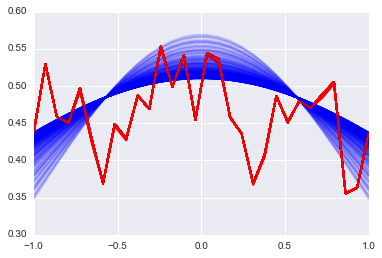

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure()
x_range = np.linspace(-1,1,30)
for i in range(len(X_test)):
    test = plt.plot(x_range, X_test[i][0:30], color='b', alpha=0.1)
    rep = plt.plot(x_range, X_predict[i][0:30], color='r', alpha=0.1)
    
plt.show()